# Analyzing the Android market

source :[link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

1. Clean the data.
2. Correct the data types.
3. Explore app categories.
4. Understand the distribution of app ratings, size, popularity, and price. 
5. Perform sentiment analysis on users' reviews. 

In [1]:
import pandas as pd 

## 1. Cleaning Data

### 1.1 googleplaystore.csv

In [2]:
data_playstore = pd.read_csv("Data/googleplaystore.csv")

In [3]:
data_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data_playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### 1.1.1 Rating

Rating is only from 0.0 to 5.0

In [19]:
print(f" Rating from {data_playstore.Rating.min()} to {data_playstore.Rating.max()}")

 Rating from 1.0 to 19.0


In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) 

Text(0.5, 1.0, 'Rating before Handling NULL')

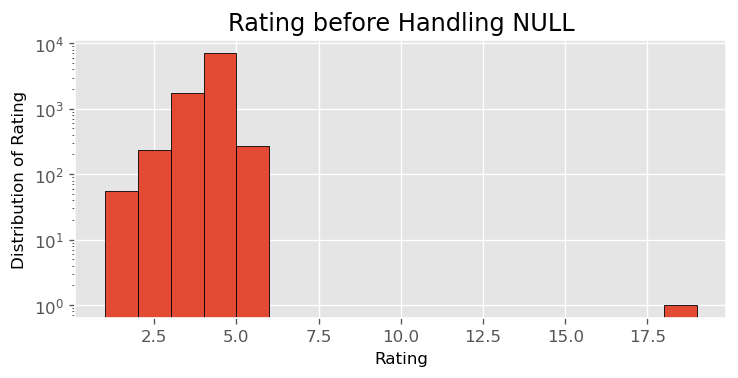

In [25]:
plt.hist(data_playstore.Rating , bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] , edgecolor='black' , log=True)
plt.xlabel("Rating")
plt.ylabel("Distribution of Rating")
plt.title("Rating before Handling NULL")


In [27]:
data_playstore[data_playstore["Rating"] > 5 ].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [38]:
data_playstore = data_playstore.drop(10472)

In [39]:
#Handing NULL function 
def fill_nulls(column):
    data_playstore[column] = data_playstore[column].fillna(method = 'bfill' , axis=0).fillna(method = 'ffill' , axis=0)

In [40]:
fill_nulls("Rating")

In [41]:
print(f"The number of Null Rating : {data_playstore.Rating.isnull().sum()}")

The number of Null Rating : 0


Text(0.5, 1.0, 'Rating after Handling NULL')

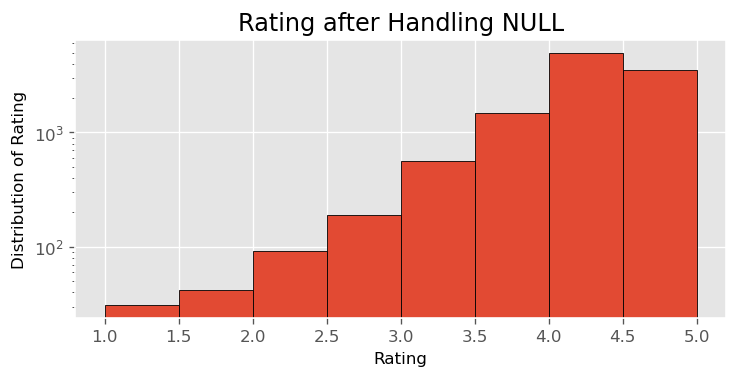

In [43]:
plt.hist(data_playstore.Rating , bins=[1,1.5,2,2.5,3,3.5,4,4.5,5] , edgecolor='black' , log=True)
plt.xlabel("Rating")
plt.ylabel("Distribution of Rating")
plt.title("Rating after Handling NULL")

#### 1.1.2 Reviews

### 1.2 googleplaystore_user_reviews.csv

In [58]:
data_user_reviews = pd.read_csv("Data/googleplaystore_user_reviews.csv")

In [59]:
data_user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [60]:
data_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [61]:
data_user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000
